# Inisialisasi Data

In [1]:
import pandas as pd

# Hasil Crawling
crawl_df = pd.read_csv('data//kad.csv')
crawl_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1895457424074494178,Fri Feb 28 12:54:00 +0000 2025,855,Akhirnya Pertamina terkapar di negeri sendiri....,1895457424074494178,https://pbs.twimg.com/media/Gk3o1j9akAAlaeC.jpg,NaN,in,NaN,7,51,318,https://x.com/Y_Radianto/status/18954574240744...,1529772993530167297,Y_Radianto
1,1895345579611521443,Fri Feb 28 05:29:34 +0000 2025,65,Hari kerja terakhir karyawan Sritex... #Indone...,1895345579611521443,https://pbs.twimg.com/ext_tw_video_thumb/18953...,NaN,in,Jakarta Selatan,3,24,19,https://x.com/RickyKardjono/status/18953455796...,941458748,RickyKardjono
2,1895312943539200303,Fri Feb 28 03:19:53 +0000 2025,157,Teriak di medsos #KaburAjaDulu . Faktanya Yama...,1895312943539200303,NaN,NaN,in,"DKI Jakarta, Indonesia",11,116,29,https://x.com/Franken_blues/status/18953129435...,1301242545888849921,Franken_blues
3,1895066745599336483,Thu Feb 27 11:01:35 +0000 2025,17884,Barusan banget buka website Imigrasi New Zeala...,1895066745599336483,NaN,NaN,in,"Brisbane, Queensland",389,219,3759,https://x.com/AmirahWahdi/status/1895066745599...,68827009,AmirahWahdi
4,1895018066637135963,Thu Feb 27 07:48:09 +0000 2025,1160,Bye Indonesia #KaburAjaDulu https://t.co/LVgY8...,1895018066637135963,https://pbs.twimg.com/media/Gkx04o7X0AAOFNB.jpg,NaN,in,NaN,14,35,186,https://x.com/qrivasi/status/1895018066637135963,752746497968484353,qrivasi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1831921465211650170,Fri Sep 06 05:04:47 +0000 2024,3081,Coba sharing pengalaman pribadi kalian berjuan...,1831921465211650170,NaN,NaN,in,Indonesia,440,151,732,https://x.com/hrdbacot/status/1831921465211650170,501800437,hrdbacot
232,1825372271227060416,Mon Aug 19 03:20:37 +0000 2024,1243,Halo. ak mau informasikan lowongan di tempat k...,1825372271227060416,NaN,NaN,in,"Tokyo, Japan",87,34,385,https://x.com/farislmn/status/1825372271227060416,64129717,farislmn
233,1800178890641699308,Mon Jun 10 14:51:07 +0000 2024,4584,Aku udah beberapa kali share caranya buat #Kab...,1800178890641699308,NaN,NaN,in,"Busan, Republic of Korea",72,36,866,https://x.com/primawansatrio/status/1800178890...,104823513,primawansatrio
234,1788160002857050360,Wed May 08 10:52:21 +0000 2024,60,Selamat long weekend terkecuali buat diaspora ...,1788160002857050360,NaN,NaN,in,"Borobudur, Indonesia",5,14,1,https://x.com/lynxluna/status/1788160002857050360,69194832,lynxluna


C:\Users\hisbi\AppData\Local\Temp\ipykernel_12000\551586384.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trend_df.index = pd.to_datetime(trend_df.index, errors='coerce')


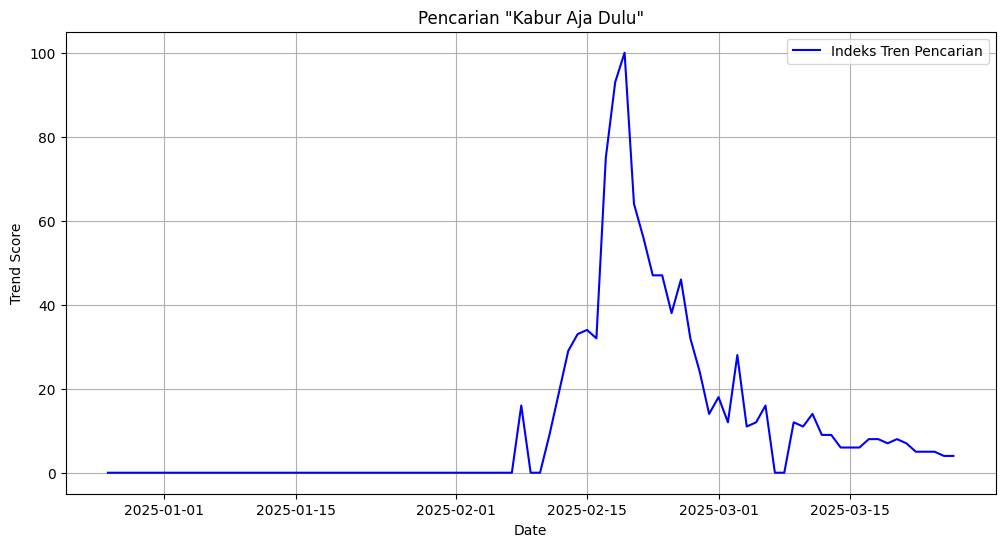

In [2]:
import matplotlib.pyplot as plt

# Visualisasi Google Trend
trend_df = pd.read_csv('data//multiTimeline.csv')

# Rename the column to remove the invalid string for conversion
trend_df.columns = ['Trend_Score']

# Convert the index to datetime for better visualization
trend_df.index = pd.to_datetime(trend_df.index, errors='coerce')

# Convert the trend score column to numeric, coercing errors to NaN
trend_df['Trend_Score'] = pd.to_numeric(trend_df['Trend_Score'], errors='coerce')

# Drop rows with NaN values in the index or Trend_Score column
trend_df = trend_df.dropna(subset=['Trend_Score']).dropna()

# Plot the Google Trend data
plt.figure(figsize=(12, 6))
plt.plot(trend_df.index, trend_df['Trend_Score'], color='blue', label='Indeks Tren Pencarian')
plt.title('Pencarian "Kabur Aja Dulu"')
plt.xlabel('Date')
plt.ylabel('Trend Score')
plt.grid(True)
plt.legend()
plt.show()

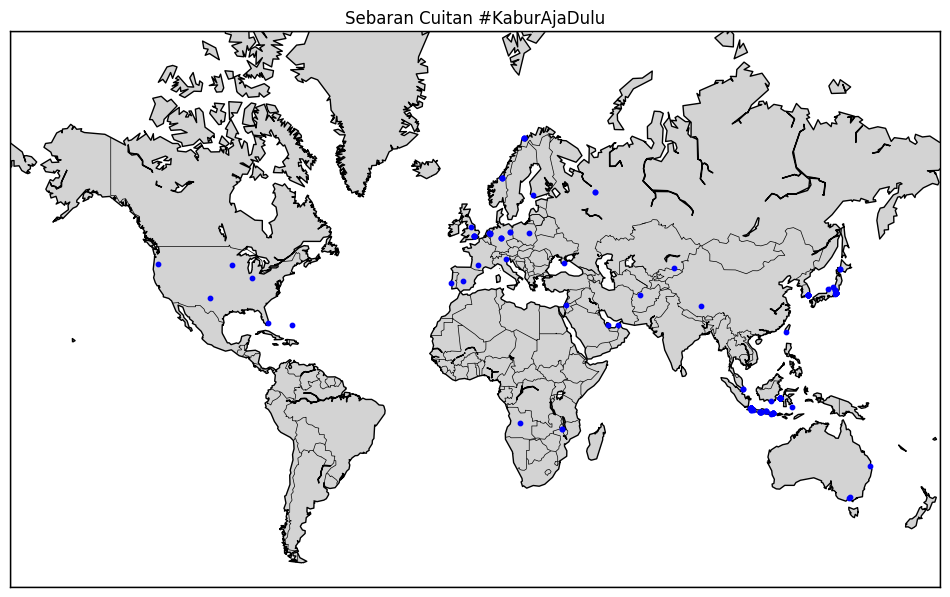

In [3]:
# Inisialisasi library yang digunakan

from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

import matplotlib.pyplot as plt

# Deteksi lokasi dari teks
geolocator = Nominatim(user_agent="geoapi")

# Function to get latitude and longitude from location
def geocode_location(location):
    try:
        if pd.notna(location):
            loc = geolocator.geocode(location, timeout=10)
            if loc:
                return loc.latitude, loc.longitude
    except GeocoderTimedOut:
        pass
    return None, None

# Terapkan geocoding ke kolom 'location'
crawl_df['latitude'], crawl_df['longitude'] = zip(*crawl_df['location'].apply(geocode_location))

# Filter baris dengan kordinat yang valid
valid_locations = crawl_df.dropna(subset=['latitude', 'longitude'])

# Buat  Basemap instance
plt.figure(figsize=(12, 8))
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Visualisasi details pada basemap
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray') # , lake_color='aqua'
m.drawmapboundary(fill_color='white')

# Plot lokasi
x, y = m(valid_locations['longitude'].values, valid_locations['latitude'].values)
m.scatter(x, y, marker='o', color='blue', zorder=5, s=10)

plt.title("Sebaran Cuitan #KaburAjaDulu")
plt.show()

# EDA

In [4]:
# Count locations in Indonesia
indonesia_count = crawl_df['location'].str.contains("Indonesia", na=False).sum()

# Count locations not in Indonesia
non_indonesia_count = len(crawl_df) - indonesia_count

print(f"Locations in Indonesia: {indonesia_count}")
print(f"Locations not in Indonesia: {non_indonesia_count}")

Locations in Indonesia: 62
Locations not in Indonesia: 174


In [5]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Initialize the geolocator
geolocator = Nominatim(user_agent="geoapi")

# Function to detect country from latitude and longitude
def detect_country(lat, lon):
    try:
        if pd.notna(lat) and pd.notna(lon):
            location = geolocator.reverse((lat, lon), timeout=10)
            if location and 'country' in location.raw['address']:
                return location.raw['address']['country']
    except GeocoderTimedOut:
        pass
    return None

# Apply the function to detect countries
valid_locations['detected_country'] = valid_locations.apply(
    lambda row: detect_country(row['latitude'], row['longitude']), axis=1
)

# Display the updated DataFrame
valid_locations[['latitude', 'longitude', 'detected_country']]
valid_locations.to_csv('data//kad_geocoded.csv', index=False)

C:\Users\hisbi\AppData\Local\Temp\ipykernel_12000\2534532740.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_locations['detected_country'] = valid_locations.apply(


In [9]:
# Create a pivot table by detected_country and count occurrences, then rename the column and save to CSV
list_country = valid_locations['detected_country'].value_counts().rename("total")
list_country.to_csv('data//list_country.csv')
list_country

detected_country
Indonesia                   97
日本                          16
대한민국                        11
Norge                        6
Deutschland                  5
United Kingdom               5
United States                5
Australia                    3
Nederland                    3
Malawi                       2
Россия                       2
Singapore                    2
España                       1
Italia                       1
قطر                          1
الإمارات العربية المتحدة     1
Suomi / Finland              1
ישראל                        1
中国                           1
Angola                       1
臺灣                           1
Polska                       1
France                       1
افغانستان                    1
Қазақстан                    1
Україна                      1
Portugal                     1
Name: total, dtype: int64

## Urutkan Tertinggi

### Likes

In [10]:
likes_crawl_df = crawl_df.sort_values(by='favorite_count', ascending=False)
likes_crawl_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,latitude,longitude
102,1891059049656930362,Sun Feb 16 09:36:26 +0000 2025,47541,#intinyadeh Menteri Bahlil blg yg #KaburAjaDul...,1891059049656930362,NaN,NaN,in,di ujung lidah tapi gak keluar,327,278,11858,https://x.com/intinyadeh/status/18910590496569...,1525880650829467648,intinyadeh,NaN,NaN
116,1890712366884528542,Sat Feb 15 10:38:50 +0000 2025,44034,Video yang dihapus oleh tiktok ditonton lebih ...,1890712366884528542,https://pbs.twimg.com/ext_tw_video_thumb/18907...,NaN,in,NaN,381,466,13551,https://x.com/AbanggSayur/status/1890712366884...,1102960516832550912,AbanggSayur,NaN,NaN
99,1891404280361349548,Mon Feb 17 08:28:15 +0000 2025,40950,Bosen di INDONESIA? Mau kabur? berikut TUTORIA...,1891404280361349548,https://pbs.twimg.com/media/Gj-eKlhbkAAHZbO.jpg,NaN,in,"Klaten, Jawa Tengah",361,471,5897,https://x.com/DndySaputra/status/1891404280361...,3152945558,DndySaputra,-7.673239,110.628478
143,1890038899269083464,Thu Feb 13 14:02:43 +0000 2025,40689,putra putri terbaik bangsa lebih milih #KaburA...,1890038899269083464,https://pbs.twimg.com/media/GjrEW8oaoAEHzzv.jpg,NaN,in,NaN,742,775,6491,https://x.com/awesomeposted/status/18900388992...,1547936519695978498,awesomeposted,NaN,NaN
195,1887345545553059967,Thu Feb 06 03:40:17 +0000 2025,35795,Yg punya info loker di LN tlg share di sini #K...,1887345545553059967,NaN,NaN,in,Indonesia,396,521,7049,https://x.com/berlianidris/status/188734554555...,230696471,berlianidris,-2.483383,117.890285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1890500987552510248,Fri Feb 14 20:38:53 +0000 2025,24,jangan tanya nasionalis ku bung #KaburAjaDulu ...,1890500987552510248,https://pbs.twimg.com/amplify_video_thumb/1889...,NaN,in,(•͡˘˛˘ •͡)┌П┐,0,18,3,https://x.com/suk4bebek_v2/status/189050098755...,1656037556700721152,suk4bebek_v2,60.912951,46.357467
58,1891850290019651687,Tue Feb 18 14:00:32 +0000 2025,24,#IndonesiaGelap #IndonesiaGelap2025 Mending ka...,1891850290019651687,NaN,NaN,in,"Sukabumi, Indonesia",0,20,1,https://x.com/putr1432/status/1891850290019651687,1691307345807282176,putr1432,-6.919929,106.926509
16,1893914172406042845,Mon Feb 24 06:41:40 +0000 2025,22,galau hari terakhir sebelum #KaburAjaDulu http...,1893914172406042845,https://pbs.twimg.com/amplify_video_thumb/1893...,NaN,in,"Warsaw, Poland",1,24,0,https://x.com/imdinoz/status/1893914172406042845,1544130046159269888,imdinoz,52.233717,21.071432
27,1893142329126723725,Sat Feb 22 03:34:38 +0000 2025,22,kalian pengen minggat ga? kalo iya ke mana? #K...,1893142329126723725,NaN,NaN,in,NaN,0,22,0,https://x.com/vrnitt/status/1893142329126723725,1106892110857302017,vrnitt,NaN,NaN


### Retweet

In [11]:
retweet_crawl_df = crawl_df.sort_values(by='favorite_count', ascending=False)
retweet_crawl_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,latitude,longitude
102,1891059049656930362,Sun Feb 16 09:36:26 +0000 2025,47541,#intinyadeh Menteri Bahlil blg yg #KaburAjaDul...,1891059049656930362,NaN,NaN,in,di ujung lidah tapi gak keluar,327,278,11858,https://x.com/intinyadeh/status/18910590496569...,1525880650829467648,intinyadeh,NaN,NaN
116,1890712366884528542,Sat Feb 15 10:38:50 +0000 2025,44034,Video yang dihapus oleh tiktok ditonton lebih ...,1890712366884528542,https://pbs.twimg.com/ext_tw_video_thumb/18907...,NaN,in,NaN,381,466,13551,https://x.com/AbanggSayur/status/1890712366884...,1102960516832550912,AbanggSayur,NaN,NaN
99,1891404280361349548,Mon Feb 17 08:28:15 +0000 2025,40950,Bosen di INDONESIA? Mau kabur? berikut TUTORIA...,1891404280361349548,https://pbs.twimg.com/media/Gj-eKlhbkAAHZbO.jpg,NaN,in,"Klaten, Jawa Tengah",361,471,5897,https://x.com/DndySaputra/status/1891404280361...,3152945558,DndySaputra,-7.673239,110.628478
143,1890038899269083464,Thu Feb 13 14:02:43 +0000 2025,40689,putra putri terbaik bangsa lebih milih #KaburA...,1890038899269083464,https://pbs.twimg.com/media/GjrEW8oaoAEHzzv.jpg,NaN,in,NaN,742,775,6491,https://x.com/awesomeposted/status/18900388992...,1547936519695978498,awesomeposted,NaN,NaN
195,1887345545553059967,Thu Feb 06 03:40:17 +0000 2025,35795,Yg punya info loker di LN tlg share di sini #K...,1887345545553059967,NaN,NaN,in,Indonesia,396,521,7049,https://x.com/berlianidris/status/188734554555...,230696471,berlianidris,-2.483383,117.890285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1890500987552510248,Fri Feb 14 20:38:53 +0000 2025,24,jangan tanya nasionalis ku bung #KaburAjaDulu ...,1890500987552510248,https://pbs.twimg.com/amplify_video_thumb/1889...,NaN,in,(•͡˘˛˘ •͡)┌П┐,0,18,3,https://x.com/suk4bebek_v2/status/189050098755...,1656037556700721152,suk4bebek_v2,60.912951,46.357467
58,1891850290019651687,Tue Feb 18 14:00:32 +0000 2025,24,#IndonesiaGelap #IndonesiaGelap2025 Mending ka...,1891850290019651687,NaN,NaN,in,"Sukabumi, Indonesia",0,20,1,https://x.com/putr1432/status/1891850290019651687,1691307345807282176,putr1432,-6.919929,106.926509
16,1893914172406042845,Mon Feb 24 06:41:40 +0000 2025,22,galau hari terakhir sebelum #KaburAjaDulu http...,1893914172406042845,https://pbs.twimg.com/amplify_video_thumb/1893...,NaN,in,"Warsaw, Poland",1,24,0,https://x.com/imdinoz/status/1893914172406042845,1544130046159269888,imdinoz,52.233717,21.071432
27,1893142329126723725,Sat Feb 22 03:34:38 +0000 2025,22,kalian pengen minggat ga? kalo iya ke mana? #K...,1893142329126723725,NaN,NaN,in,NaN,0,22,0,https://x.com/vrnitt/status/1893142329126723725,1106892110857302017,vrnitt,NaN,NaN


# Ratio (quote tweet > like)

In [12]:
quote_greater_than_favorite = crawl_df[crawl_df['quote_count'] > crawl_df['favorite_count']]
quote_greater_than_favorite

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,latitude,longitude
85,1891470533281165513,Mon Feb 17 12:51:31 +0000 2025,276,Menteri ATR/BPN Nusron Wahid tanggapi tagar #K...,1891470533281165513,NaN,NaN,in,NaN,305,647,62,https://x.com/detikcom/status/1891470533281165513,69183155,detikcom,NaN,NaN
115,1890752284205666672,Sat Feb 15 13:17:27 +0000 2025,889,Hukum #KaburAjaDulu ke negeri non muslim ? htt...,1890752284205666672,https://pbs.twimg.com/ext_tw_video_thumb/18907...,NaN,in,Indonesia,1735,886,218,https://x.com/fotodakwah/status/18907522842056...,105428309,fotodakwah,-2.483383,117.890285
